# Explore here

In [ ]:
# Your code here
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.preprocessing import image

In [ ]:
# Directorios de datos
data_dir = "..\data"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
img_size = (100, 100)
batch_size = 16

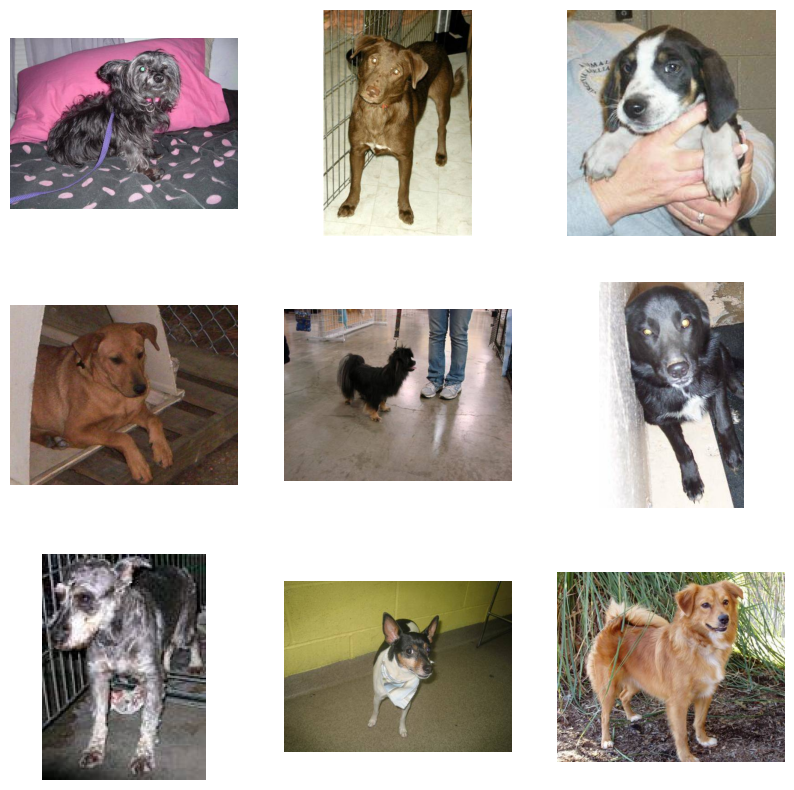

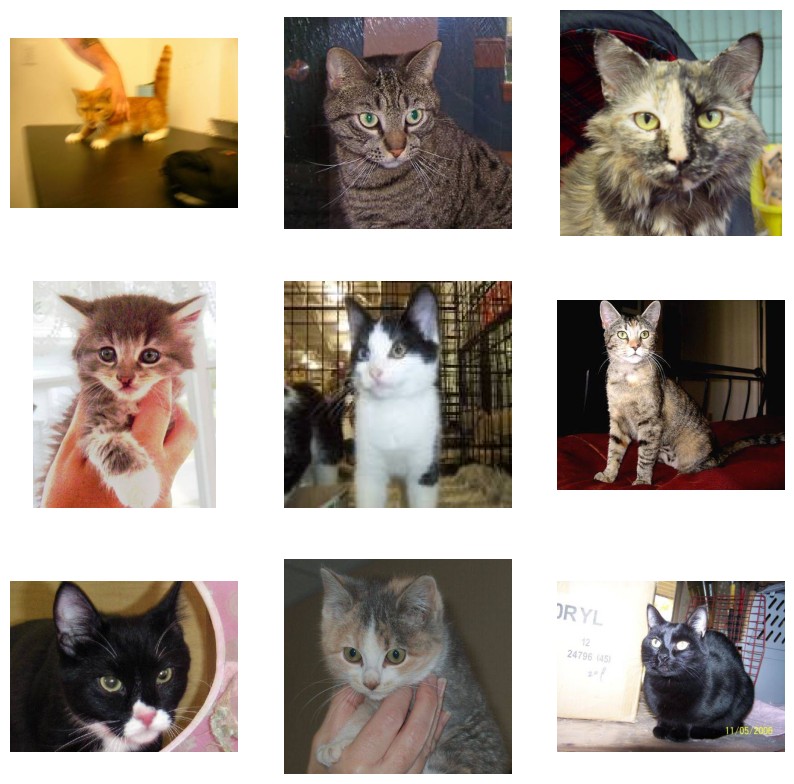

In [4]:
# Verificar imágenes de ejemplo
def plot_images(path, category):
    category_path = os.path.join(path, category)
    if not os.path.exists(category_path):
        print(f"No se encontró el directorio {category_path}")
        return
    images = [os.path.join(category_path, img) for img in os.listdir(category_path)][:9]
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for img_path, ax in zip(images, axes.flat):
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis("off")
    plt.show()

plot_images(train_dir, "dogs")
plot_images(train_dir, "cats")

In [5]:
# Preprocesamiento de datos con ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% para validación
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


He reducido la densidad de las capas por problemas de rendimiento

In [6]:
# Construcción del modelo (basado en VGG16 simplificado)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

c:\Users\david\anaconda3\envs\entorno\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the Model before Training
model.compile(loss ='binary_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [ ]:
# Definir callbacks
checkpoint = ModelCheckpoint("../models/best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [9]:
# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)

c:\Users\david\anaconda3\envs\entorno\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.5320 - loss: 0.6911

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 394s 313ms/step - accuracy: 0.5320 - loss: 0.6911 - val_accuracy: 0.5048 - val_loss: 0.6886
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5809 - loss: 0.6779

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 180s 144ms/step - accuracy: 0.5809 - loss: 0.6778 - val_accuracy: 0.6512 - val_loss: 0.6305
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6826 - loss: 0.5960

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 182s 146ms/step - accuracy: 0.6826 - loss: 0.5960 - val_accuracy: 0.7264 - val_loss: 0.5347
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7512 - loss: 0.5164

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 184s 147ms/step - accuracy: 0.7512 - loss: 0.5164 - val_accuracy: 0.7670 - val_loss: 0.4823
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7765 - loss: 0.4662

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 184s 147ms/step - accuracy: 0.7765 - loss: 0.4662 - val_accuracy: 0.7804 - val_loss: 0.4566
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8127 - loss: 0.4102

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 184s 147ms/step - accuracy: 0.8127 - loss: 0.4102 - val_accuracy: 0.7966 - val_loss: 0.4419
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8398 - loss: 0.3583

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 189s 151ms/step - accuracy: 0.8398 - loss: 0.3583 - val_accuracy: 0.7988 - val_loss: 0.4368
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 187s 150ms/step - accuracy: 0.8711 - loss: 0.3057 - val_accuracy: 0.7914 - val_loss: 0.4678
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8938 - loss: 0.2597

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 185s 148ms/step - accuracy: 0.8938 - loss: 0.2598 - val_accuracy: 0.8096 - val_loss: 0.4294
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 182s 146ms/step - accuracy: 0.9177 - loss: 0.2061 - val_accuracy: 0.8022 - val_loss: 0.5179
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 184s 147ms/step - accuracy: 0.9310 - loss: 0.1715 - val_accuracy: 0.8094 - val_loss: 0.5576
Epoch 12/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9458 - loss: 0.1433

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 183s 147ms/step - accuracy: 0.9458 - loss: 0.1433 - val_accuracy: 0.8164 - val_loss: 0.5825
Epoch 13/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 185s 148ms/step - accuracy: 0.9531 - loss: 0.1211 - val_accuracy: 0.8050 - val_loss: 0.6045
Epoch 14/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 185s 148ms/step - accuracy: 0.9591 - loss: 0.1091 - val_accuracy: 0.8064 - val_loss: 0.7007


In [28]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(val_generator)
print(f"Exactitud en el conjunto de prueba: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8026 - loss: 0.7099
Exactitud en el conjunto de prueba: 0.8064


El modelo tiene un accuracy de más del 80% en el conjunto de validación, lo que significa que el modeloa ha conseguido distinguir gatos y perros de manera sólida.

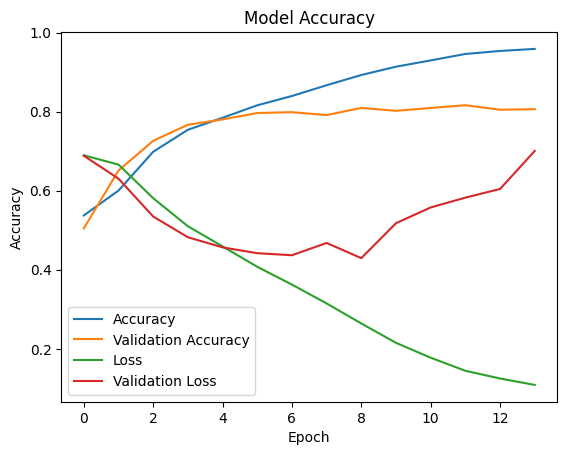

In [13]:
# Check the Accuracy of the Data

# Plot the Results
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

En la gráfica se ve que: Validation Loss empieza a subir a partir de la época 6 más o menos, mientras el loss de train sigue bajando, lo cual indica overfitting. El early stopping probablemente debería haber actuado un poco antes.

Prueba del modelo prediciendo imágenes del test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicción: Perro (confianza: 100.00%)


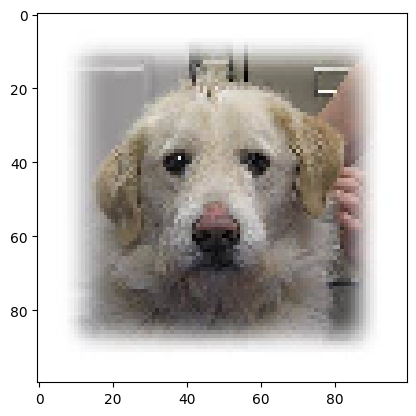

In [24]:
img = image.load_img("../data/test/ts/3.jpg", target_size = (100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)[0][0]
if prediction < 0.5:
    print(f"Predicción: Gato (confianza: {(1 - prediction)*100:.2f}%)")
else:
    print(f"Predicción: Perro (confianza: {prediction*100:.2f}%)")
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicción: Perro (confianza: 100.00%)


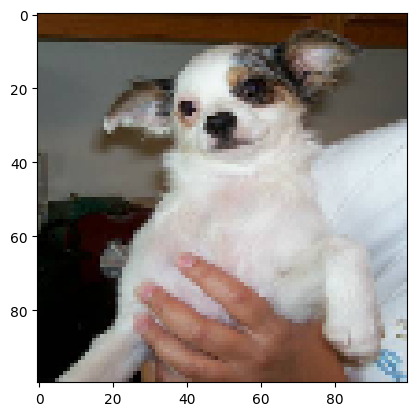

In [25]:
img = image.load_img("../data/test/ts/3000.jpg", target_size = (100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)[0][0]
if prediction < 0.5:
    print(f"Predicción: Gato (confianza: {(1 - prediction)*100:.2f}%)")
else:
    print(f"Predicción: Perro (confianza: {prediction*100:.2f}%)")
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicción: Gato (confianza: 100.00%)


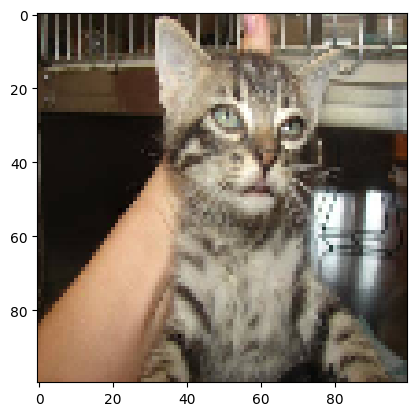

In [27]:
img = image.load_img("../data/test/ts/2500.jpg", target_size = (100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)[0][0]
if prediction < 0.5:
    print(f"Predicción: Gato (confianza: {(1 - prediction)*100:.2f}%)")
else:
    print(f"Predicción: Perro (confianza: {prediction*100:.2f}%)")
plt.imshow(img)

Funciona correctamente